In this project, we will analyze [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) to find which variables are related to the disease. Then we will use different machine learning models to predict whether the patient has  cardiovascular disease or not. <br>The dataset contains information about patients doing cardiovascular disease examination.<br><br>
**Data features:**
   - Age | Objective Feature | age | int (days)<br>
   - Height | Objective Feature | height | int (cm) |<br>
   - Weight | Objective Feature | weight | float (kg) |<br>
   - Gender | Objective Feature | gender | categorical code |<br>
   - Systolic blood pressure | Examination Feature | ap_hi | int |<br>
   - Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
   - Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
   - Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
   - Smoking | Subjective Feature | smoke | binary |<br>
   - Alcohol intake | Subjective Feature | alco | binary |<br>
   - Physical activity | Subjective Feature | active | binary |<br>
   - Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>


# 1. Data preprocessing and cleaning

In this stage, we're working to acheive a clean dataset by removing duplicates and extract important variables that we need such as patients age, gender, height, etc.<br>
Down here we're importing the libraries that we'll use such as pandas, which is a famous data analysis python library and other utility libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Here, we're reading the data file which is saved as csv (Comma Seperated Values) and we're also telling pandas that our values are seperated by a semicolon and that the first row is the data heading.<br>
The head method in the second line lists the first 5 rows of the file excluding the data heading.

In [2]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv', sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We need to know the number of rows and columns we're dealing with in data so we're achieving this by using the shape method.

In [3]:
print(f"Number of columns: { df.shape[1] }")

Number of columns: 13


In [4]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 70000


Checking if there's NULL value in any of the cells.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values

In our dataset, the patients age is written in days, so we're converting it to years and rounding it to the nearest 2 decimals. Also we're replacing the gender column with another two-columns, one for male and the other is for female. If the patients' gender is male then a value of 1 will be inside the male column and zero inside the female column and vice-versa.

In [6]:
df['age'] = round(df['age']/365.25,2)

In [7]:
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

Checking if there ary any duplicates in our rows and printing the duplicated rows count.

In [8]:
df.duplicated().sum()

75

Dropping all duplicated rows.

In [9]:
df.drop_duplicates(inplace=True)

Down here, we're calculating the patient BMI (Body Mass Index) using the formula which is: $\frac{Weight}{Height^{2}}$<br>
In our dataset, the height of patients were in centimeters so we divided it by 100 to convert it into meters.

In [10]:
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

The describe method used down here gives us a ready-to-go primary statistics calculations such as the mean average, standard deviation (STD) and the five quartiles.

In [11]:
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000
mean,53.302892,0.650268,0.349732,164.358699,74.215407,27.560388,128.826314,96.648538,1.367222,1.226671,0.088223,0.053829,0.803661,0.499979
std,6.755908,0.476889,0.476889,8.213453,14.399663,6.093355,154.093668,188.572745,0.680480,0.572490,0.283621,0.225682,0.397231,0.500004
min,29.560000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.360000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.940000,1.000000,0.000000,165.000000,72.000000,26.400000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,82.000000,30.230000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Concluding this data, we've found the following:
- The **mean age** for patients is 53.
- The **percentage of males** is 35.
- The **percentage of females** is 65.
- The **percentage of smokers** is 8.
- The **percentage of alcoholists** is 5.
- The **percentage of patients who do sports** is 80.

It seems there are mony outliers in body mass index, may be it's a mistake. So, lets drop outliers.

In [12]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [13]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

normal      38937
high 1      15378
high 2      15021
elevated      419
high 3         77
Name: bp_cat, dtype: int64

We can also drop outliers from blood pressure variables

In [14]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

**Finally, we've finished cleaning and sorting our dataset according to our needs.**

In [15]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


# 2. Data analysis

In this stage, we're using pyplot and seaborn library to analyse our data through visualization such as pie-chart, bar-chart and boxplot instead of using just plain numbers and tables.

Here, we're defining a variable of standard and unique color for the visualization to avoid distraction to the reader.

In [16]:
base_color = sb.color_palette()[0]

We wanted to show the percentage of males and females using a pie-chart but we removed that column earlier in order to achieve flexibility for Machine Learning models, so, we had to create a workaround by creating a function to merge the gender columns in our dataset (male,female) into one column called gender.

In [17]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

Here, we're using the libraries mentioned before in creating the visualizations we want.

''

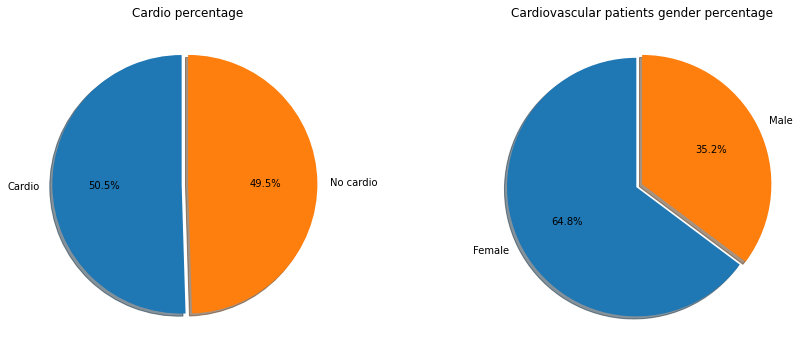

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

**Concluding the charts, we've found the following:**
- The percentage of people with cardiovascular diseases is 50%.
- The percentage of males with cardiovascular diseases is 35.3%.
- The percentage of females with cardiovascular diseases is 64.7%.

<hr>

**Here we're making boxplots to compare the age and body mass index for the cardio and non-cardio patients.**

''

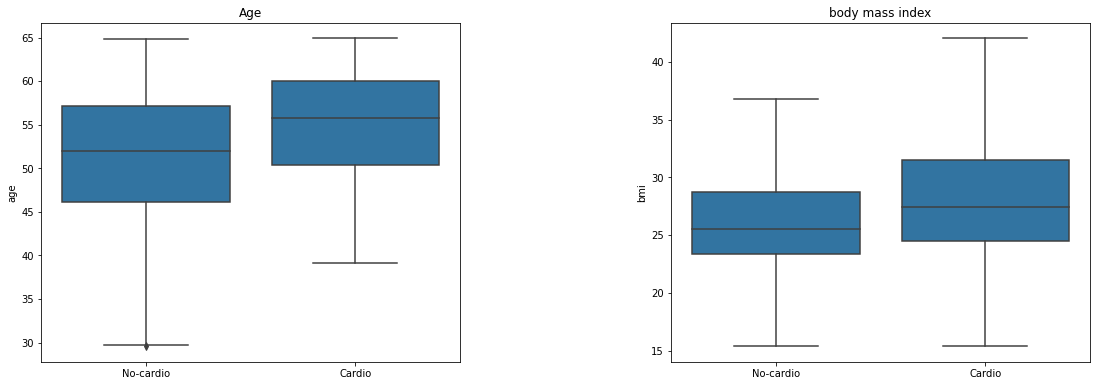

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
;

**Concluding the following, we've found the following:**
- A relation is found between the age of people and cardiovascular diseases, thus, elderly people are most likely to have this kind of diseases.
- Another relation is found between the BMI and cardiovascular diseases, thus, people with higher BMI are also most likely to to have this kind of diseases.

<hr>

In the following code, we're trying to find other general relations between our variables in the dataset.

''

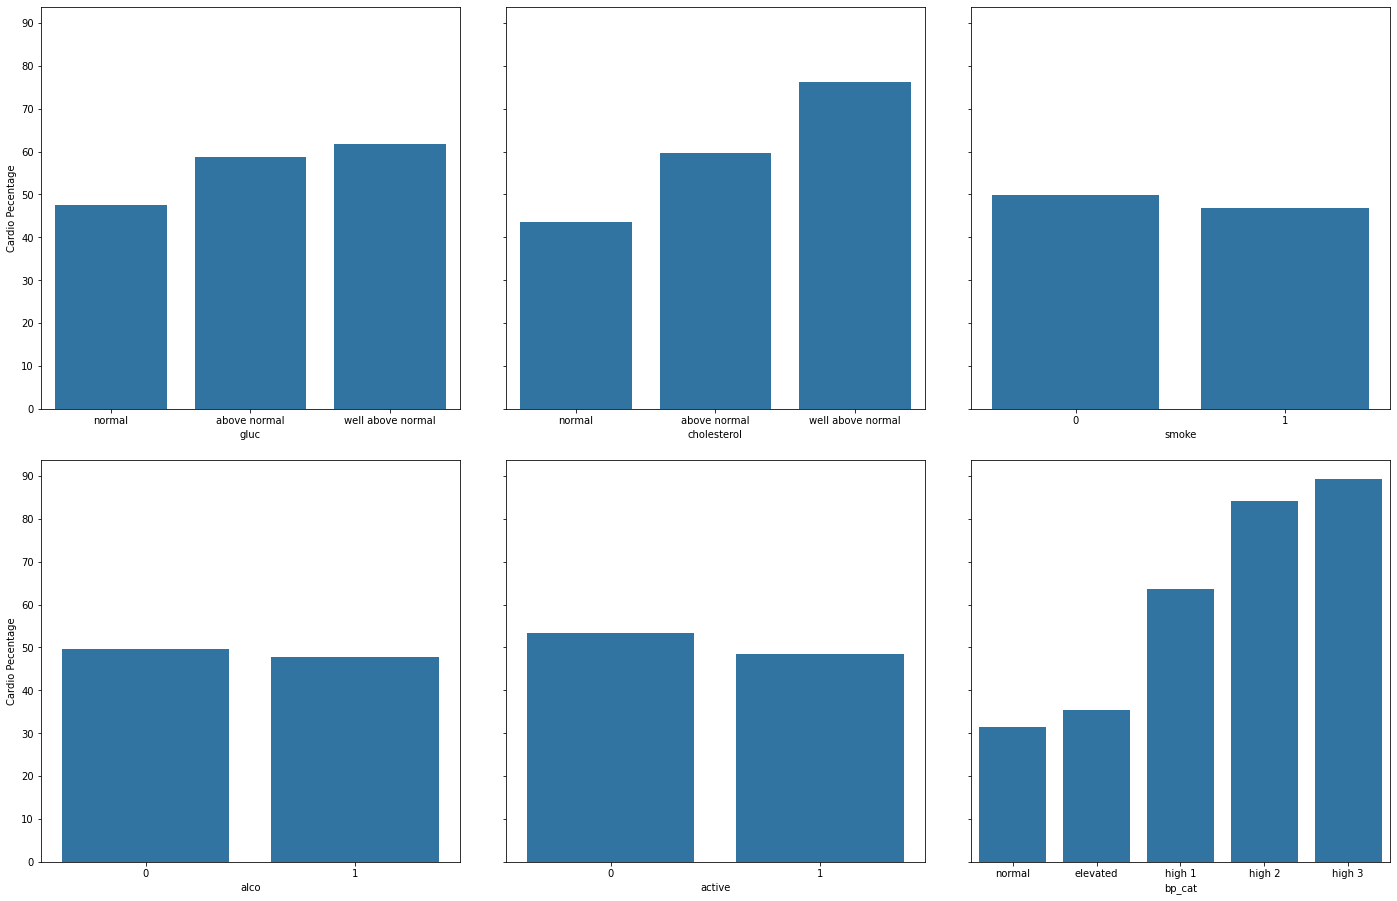

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sb.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_cat').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')
;

**Concluding the following, we've found the following:**
- A relation is found between the glucose levels and cardiovascular disease, thus, 60% of people who have well above normal levels of glucose are more likely to have a cardiovascular disease.
- Another significant relation is found between the cholestrol levels and cardiovascular diseases, thus, higher cholestrol levels means more chance of encountering a cardiovascular disease.
- We've found that there is no strong bonded relationship between smoking and alcohol compared to cardiovascular diseases.
- A minor relationship is found between being doing sports and activities to cardiovascular diseases as inactive people might develop cardiovascular diseases.
- A major direct relationship is found between blood pressure and cardiovascular diseases where people who develop high blood pressure levels have the highest chances of having cardiovascular diseases.

# 3. Probability and Statistics 

**Probability that a person has cardio diseases given that he is 50 or older**

In [21]:
df_age_50 = df.query('age >=50')
df_agy_50_cardio = df_age_50.query('cardio==1')
round(df_agy_50_cardio.shape[0]*100/df_age_50.shape[0],2)

55.46

**Probability that a person has cardio diseases given that he has body mass index greater than 37**

In [22]:
df_bmi37 = df.query('bmi >=37')
df_bmi37_cardio = df_bmi37.query('cardio ==1')
round(df_bmi37_cardio.shape[0]*100/df_bmi37.shape[0],2)

68.78

**Probability that a person has cardio diseases given that the patient has a hypertensive crisis**

In [23]:
df_high3 = df.query("bp_cat == 'high 3'")
df_high_cardio = df_high3.query('cardio == 1')
round(df_high_cardio.shape[0]*100/df_high3.shape[0],2)

89.29

**Probability that a person drinks alcohol or smokes**

In [24]:
df_cohol_smoke = df.query("alco==1 or smoke==1")
print(df_cohol_smoke.shape[0]*100/df.shape[0])

11.53756450249264


**Probability that a person has cardio diseases given that the patient drinks alcohol or smokes**

In [25]:
df_cohol_smoke_cadrio = df_cohol_smoke.query('cardio==1')
df_cohol_smoke_cadrio.shape[0]*100/df_cohol_smoke.shape[0]

47.95957043588124

**Probability that a person has cardio diseases given that the patient is not active**

In [26]:
df_not_active = df.query('active==0')
df_not_active_cardio = df_not_active.query('cardio==1')
df_not_active_cardio.shape[0]*100/df_not_active.shape[0]

53.28196769891836

# 4. Predicting using Machine Learning

In this stage, we're using Machine Learning (ML) to predict the existence of cardiovascular diseases in patients according to our dataset. As known, there are various Machine Learning (ML) algorithms that are widely used, hence, we're using multiple algorithms and comparing them to each other according to their results.

In the cell below, we're importing libraries that will enable us to use Machine Learning algorithms.<br>Mainly, these are the algorithms that we are using:
- Random Forest Classifier
- Support Vector Classifier
- K Neighbors Classifier
- X Gradient Boost Classifier

We're also using metrics libraries to evaluate our predictions. As for prediction evaluation, we're using the following libraries:
- Accuracy Score
- Confusion Matrix

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [28]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


Here, we're dropping the cardio column in our dataset as this will be our target prediction variable.<br>Since Machine Learning understands numerical values only, we're also dropping the blood pressure category column as it's datatype is string.

In [29]:
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']

We need to split our data in two groups, one is used for training our model and the other is for testing and evaluating.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
#check for linearity
m9 = LinearRegression().fit(X, y)
r2_score(m9.predict(X), y)

-2.3806014237948987

####  X Gradient Boost

Just like Random Forest Classifier, the XGB classifier uses a decision-tree algorithm but also with a gradient boosting framework. Rather than training all of the models in isolation of one another, boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones.<br><br><img width="20%" src="https://miro.medium.com/max/461/1*A9myadIB_CqJv-EJA-G_bA.png">

As usual, we're training our model.

In [53]:
# ROUND 1
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 0.1],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# ROUND 2
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.5, 0.7],
#     'gamma': [0.25],
#     'reg_lambda': [50.0, 100, 150],
#     'scale_pos_weight': [3]
# }

# ROUND 3
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.5, 0.7],
#     'gamma': [0.25],
#     'reg_lambda': [50.0, 100, 150],
#     'scale_pos_weight': [3]
# }

# ROUND 4  
# param_grid= = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.65, 0.55],
#     'gamma': [0.25],
#     'reg_lambda': [40.0, 50.0, 60.0],
#     'scale_pos_weight': [3]
# }

## Winner Winner Chicken Dinner!!!!!
# param_grid={'gamma': [0.24],
#  'learning_rate': [.13],
#  'max_depth': [5],
#  'reg_lambda': [50],
#     'n_estimators': [150]}

In [54]:
# optimal_params = GridSearchCV(
#     estimator=XGBClassifier(objective="binary:logistic",
#                             seed=0,
#                             subsample=0.9),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=7,
#     cv=5
# )

In [55]:
# optimal_params.fit(
#                 X_train, 
#                 y_train, 
#                 verbose=False,
#                 early_stopping_rounds=10,
#                 eval_metric='aucpr',
#                 eval_set=[(X_test, y_test)])

In [56]:
# optimal_params.best_params_

In [57]:
boost_model = XGBClassifier(verbosity=0, seed=0, n_estimators=150,
                            gamma= 0.24, max_depth=4, learning_rate=0.13,
                            reg_lambda=50.0, scale_pos_weight=1)

boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
print(f"Testing accuracy: {round((accuracy_score(boost_pred, y_test)*100),2)}%")
xgb_cross = cross_validate(boost_model, X, y, cv=11)
print(f"Average testing accuracy: {round((xgb_cross['test_score'].mean()*100),4)}%")

Testing accuracy: 72.95%
Average testing accuracy: 73.5999%


Again, we're predicting our new values.

''

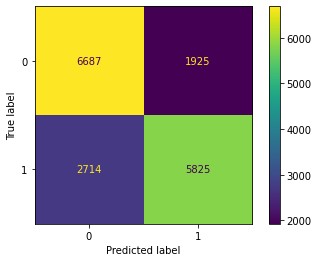

In [58]:
plot_confusion_matrix(boost_model, X_test, y_test, values_format='d')
;

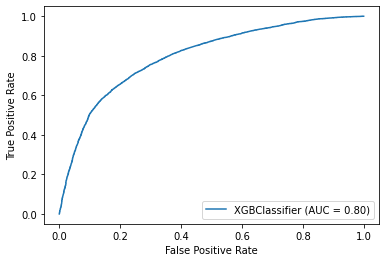

In [59]:
plot_roc_curve(boost_model, X_test, y_test)

As seen in the output, the accuracy score is the highest of all models used before, however, type-one error equals 2728.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

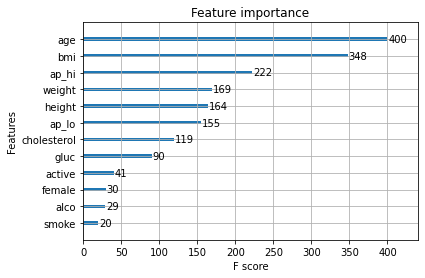

In [60]:
plot_importance(boost_model)